# Linear regression part-2

In our earlier class we have discussed about the cost function and its importance in lineaer regression. The objective in any regression method is to minimize the cost fucntion. In our previous class we did it manually. However we need a optimization algorithm to do it automatically. The gradient descent algorithm is one of the best optimization method for linear regression problem. Here we will try to understant about this algorithm.

In [2]:
import numpy as np
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import pylab as plb
from IPython.display import Image, display

As we discussed, we choosed the sum of square error as a cost function for this problem. Here our objective is to find the minimum value of **C** by adjusting the parameter **a** and **b**. For simplicity let us consider **a = P**1 and **b = P**2

In [3]:
display(Math(r'C(P_1, P_2) =\frac 1{2m} \sum_{i=1}^m (H_i - Y_i)^2')) # cost function 

<IPython.core.display.Math object>

## Gradient descent:

The equation of gradient descent is as given below

In [4]:
display(Math(r'P_k = P_k -\alpha\frac{\partial }{\partial P_k}C(P_1,P_2) \ ( for \ k =1 \ and \ k =2)'))

<IPython.core.display.Math object>

Here α is the learning rate or the step at which the gradient will descent. For simplicity let us take P2 = 0. The gradient of the cost function J(P1) with respect to P1 can be elastreted as given below. Now if the gradient is positive the value of P1 will decrease(as shown in green arrow). However if the gradient is negative then P1 will increase(as shown in maroon arrow), and eventually it will reach to minima of **J** at a step of α. 

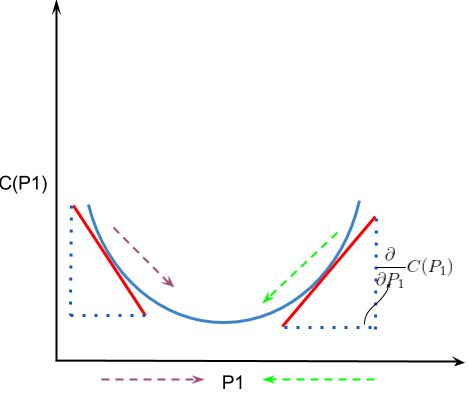

In [5]:
display(Image(filename='Linear Regression Gradnt.png'))

The learning rate will tells us that how quickly or slowly the optimization process will happen. However their is a trade off between the learning rate and accuracy of the optimization. This can be well explained with this diagram below. Let us suppose one is to step down with a step of two(as shown in red line) then it will not reach the bottom floor. If the step down happen in one steps then it will reach to the bottom floor, however this will take much time compared to two step process. Therefore we have to choose a optimized learning rate that will provide fast and better accuracy.  

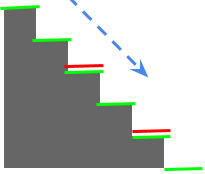

In [6]:
display(Image(filename='Learning Rate.png'))

Now if we expand the equation of the gradient descent as below.

In [7]:
display(Math(r'P_k = P_k -\alpha\frac{\partial }{\partial P_k}C(P_1,P_2) \ ( for \ k =1 \ and \ k =2)'))

<IPython.core.display.Math object>

Where 

In [8]:
display(Math(r'\frac{\partial }{\partial P_k}C(P_1,P_2) =\frac{\partial }{\partial P_k}\frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)^2'))

<IPython.core.display.Math object>

In [9]:
display(Math(r'for\ P_1:\ \frac{\partial }{\partial P_1}\frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)^2 = \frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)X^i'))

<IPython.core.display.Math object>

In [10]:
display(Math(r'for\ P_2:\ \frac{\partial }{\partial P_2}\frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)^2 = \frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)'))

<IPython.core.display.Math object>

In linear regression, the gradient descent will always find a gloabal minima, since their is no local minima for linear regression. Here we will try to manually impliment the gradient descent algorithm. 

In [11]:
def cost_f(X,Y,P): # X and Y are for the data and P is the parameters for the hypothesis.
    
    H = P[0]*X + P[1]
    
    C = (np.sum(np.square(H - Y)))/2*len(X)
    return C


In [12]:
def g_d(alpha, X, Y, P, num_itr): # alpha=learning rate, num_itr = number of iteration, P = parameters of hypothesis
    cf = np.zeros((num_itr))
    pplt = np.zeros((2, num_itr))
    for i in range(num_itr):
        p1_new = P[0] - alpha*( np.sum( (P[0]*X + P[1] - Y)*X )  ) / 2*len(X)
        p2_new = P[1] - alpha*( np.sum( (P[0]*X + P[1] - Y) )  ) / 2*len(X)
        
        # Update of new parameters
        P[0] = p1_new
        P[1] = p2_new
        
        cf[i] = cost_f(X,Y,P)
        pplt[0,i] = P[0]
        
        pplt[1,i] = P[1]
    return P, pplt, cf
        

In [28]:
P = [0.0, 0.0]
P = np.array(P)

In [29]:
X = [1, 2, 3, 4, 5]
X = np.array(X)
#X = X/max(X)
Y = [10, 40, 50, 78, 83]
Y = np.array(Y)
#Y = Y/max(Y)

In [30]:
itr = 100
alpha = 0.01

In [31]:
PP, PPlt, CF = g_d(alpha, X, Y, P, itr)

In [32]:
# Make data.
XX = PPlt[0]
YY = PPlt[1]
ZZ= CF
XXX, YYY = np.meshgrid(XX, YY)

In [ ]:
plt.figure()
cp = plt.contour(XXX, YYY, ZZ)
plt.clabel(cp, inline=True,fontsize=10)
plt.title('Contour Plot')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

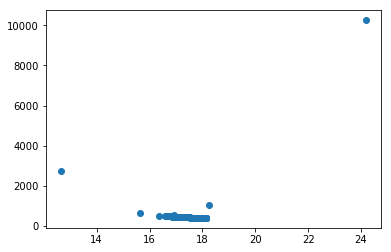

In [38]:
plt.plot(XX,CF,'o')
plt.show()

In [41]:
PP

array([ 18.15390301,  -2.11151178])

In [ ]:

import plotly 
plotly.tools.set_credentials_file(username='mohendra', api_key='XiPZpLL3u0yoNUfmskFh')

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.plot(data, filename = 'basic-line')

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [ ]:
from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [ ]:
from plotly.graph_objs import *
import numpy as np

x = PPlt[1]
y = CF
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

import numpy as np

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = Surface(x=x, y=y, z=z)
data = Data([surface])

layout = Layout(
    title='Parametric Plot',
    scene=Scene(
        xaxis=XAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=YAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=ZAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='test')

In [ ]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')

data = [go.Surface(z=df.values.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Volcano dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-surface', height=700, validate=False)

#url = py.iplot(fig, filename='pandas-3d-surface')
#fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='test2')